In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

<br><br>
# **PCOS Dataset**
<br><br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/sample_data/PCOS_data_without_infertility.xlsx", sheet_name="Full_new")
df

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.000,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.500,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.000,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.000,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.000,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,537,537,0,35,50.0,164.592,18.456637,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.316456,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.372576,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.222222,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN


<br><br>
# Cleaning Dataset
<br><br>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [4]:
# dropping erroneous/unwanted column
df = df.drop(['Unnamed: 44', 'Sl. No'], axis=1)

# Dropping NaN rows
df = df.dropna(how='any')

# Renaming columns with improper format
df.rename(columns = {" Age (yrs)": "Age (yrs)", 
                     "  I   beta-HCG(mIU/mL)":"I beta-HCG(mIU/mL)",
                     "II    beta-HCG(mIU/mL)":"II beta-HCG(mIU/mL)"
                    }, inplace = True)

#Converting Y/N column from float to integer type
df['PCOS (Y/N)'] = df['PCOS (Y/N)'].astype('int64')
df['Pregnant(Y/N)'] = df['Pregnant(Y/N)'].astype('int64')
df['Weight gain(Y/N)'] = df['Weight gain(Y/N)'].astype('int64')
df['hair growth(Y/N)'] = df['hair growth(Y/N)'].astype('int64')
df['Skin darkening (Y/N)'] = df['Skin darkening (Y/N)'].astype('int64')
df['Hair loss(Y/N)'] = df['Hair loss(Y/N)'].astype('int64')
df['Pimples(Y/N)'] = df['Pimples(Y/N)'].astype('int64')
df['Fast food (Y/N)'] = df['Fast food (Y/N)'].astype('int64')
df['Reg.Exercise(Y/N)'] = df['Reg.Exercise(Y/N)'].astype('int64')


df['II beta-HCG(mIU/mL)'] = df['II beta-HCG(mIU/mL)'].astype('float64')
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 539 entries, 0 to 540
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient File No.       539 non-null    int64  
 1   PCOS (Y/N)             539 non-null    int64  
 2   Age (yrs)              539 non-null    int64  
 3   Weight (Kg)            539 non-null    float64
 4   Height(Cm)             539 non-null    float64
 5   BMI                    539 non-null    float64
 6   Blood Group            539 non-null    int64  
 7   Pulse rate(bpm)        539 non-null    int64  
 8   RR (breaths/min)       539 non-null    int64  
 9   Hb(g/dl)               539 non-null    float64
 10  Cycle(R/I)             539 non-null    int64  
 11  Cycle length(days)     539 non-null    int64  
 12  Marraige Status (Yrs)  539 non-null    float64
 13  Pregnant(Y/N)          539 non-null    int64  
 14  No. of aborptions      539 non-null    int64  
 15  I beta

<br><br>
# Analysing Data
<br><br>

Supported values for 'cmap' are: 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

<br><br>
## **Correlation between all variables**

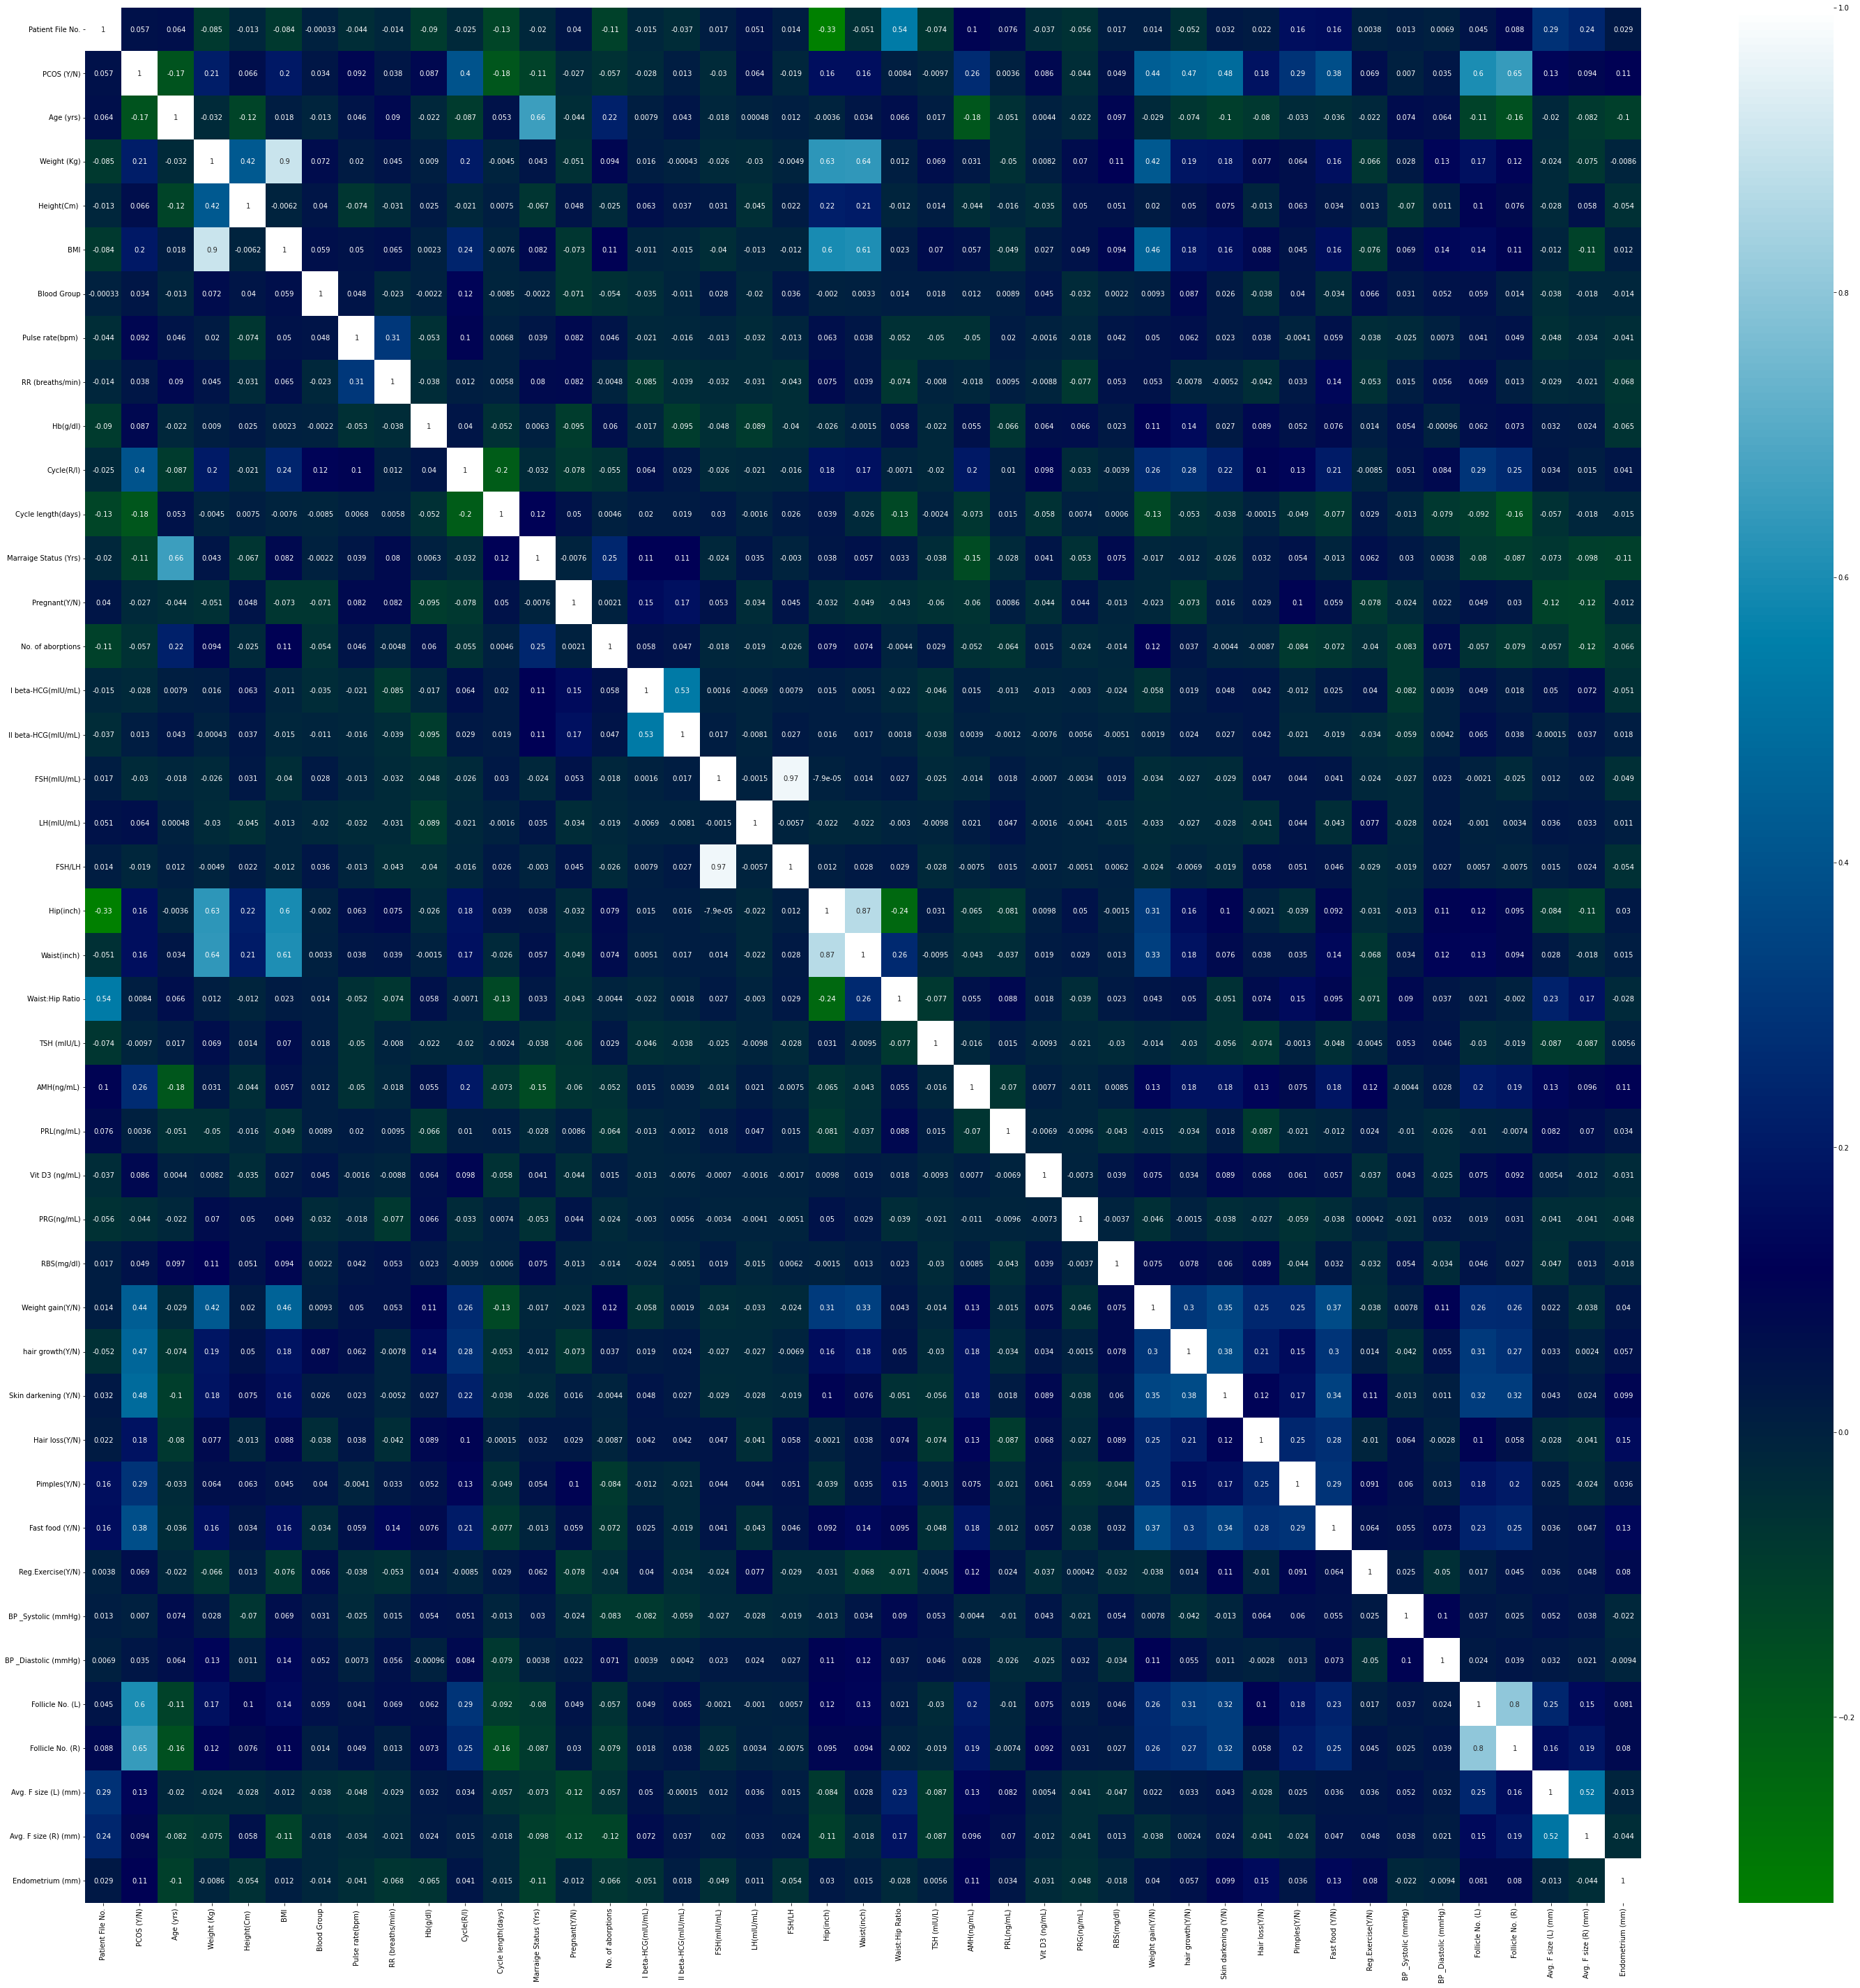

In [5]:
plt.figure(figsize=(50, 50))
sns.heatmap(df.corr(), annot=True, cmap='ocean')

In [6]:
# Get sorted order of correlation values
sorted_mat_ascending = df.corr().unstack().sort_values()
sorted_mat_descending = df.corr().unstack().sort_values(ascending=False)
  
print("Negatively correlated features: \n{0}".format(sorted_mat_ascending[0:10]))
print("\n\nPositively correlated features: \n{0}".format(sorted_mat_descending[40:55]))

Negatively correlated features: 
Patient File No.    Hip(inch)            -0.330364
Hip(inch)           Patient File No.     -0.330364
                    Waist:Hip Ratio      -0.244354
Waist:Hip Ratio     Hip(inch)            -0.244354
Cycle length(days)  Cycle(R/I)           -0.204648
Cycle(R/I)          Cycle length(days)   -0.204648
PCOS (Y/N)          Cycle length(days)   -0.183781
Cycle length(days)  PCOS (Y/N)           -0.183781
Age (yrs)           AMH(ng/mL)           -0.181457
AMH(ng/mL)          Age (yrs)            -0.181457
dtype: float64


Positively correlated features: 
Age (yrs)              Age (yrs)                1.000000
Waist(inch)            Waist(inch)              1.000000
Endometrium (mm)       Endometrium (mm)         1.000000
FSH(mIU/mL)            FSH/LH                   0.971956
FSH/LH                 FSH(mIU/mL)              0.971956
BMI                    Weight (Kg)              0.902243
Weight (Kg)            BMI                      0.902243
Waist(in

[]

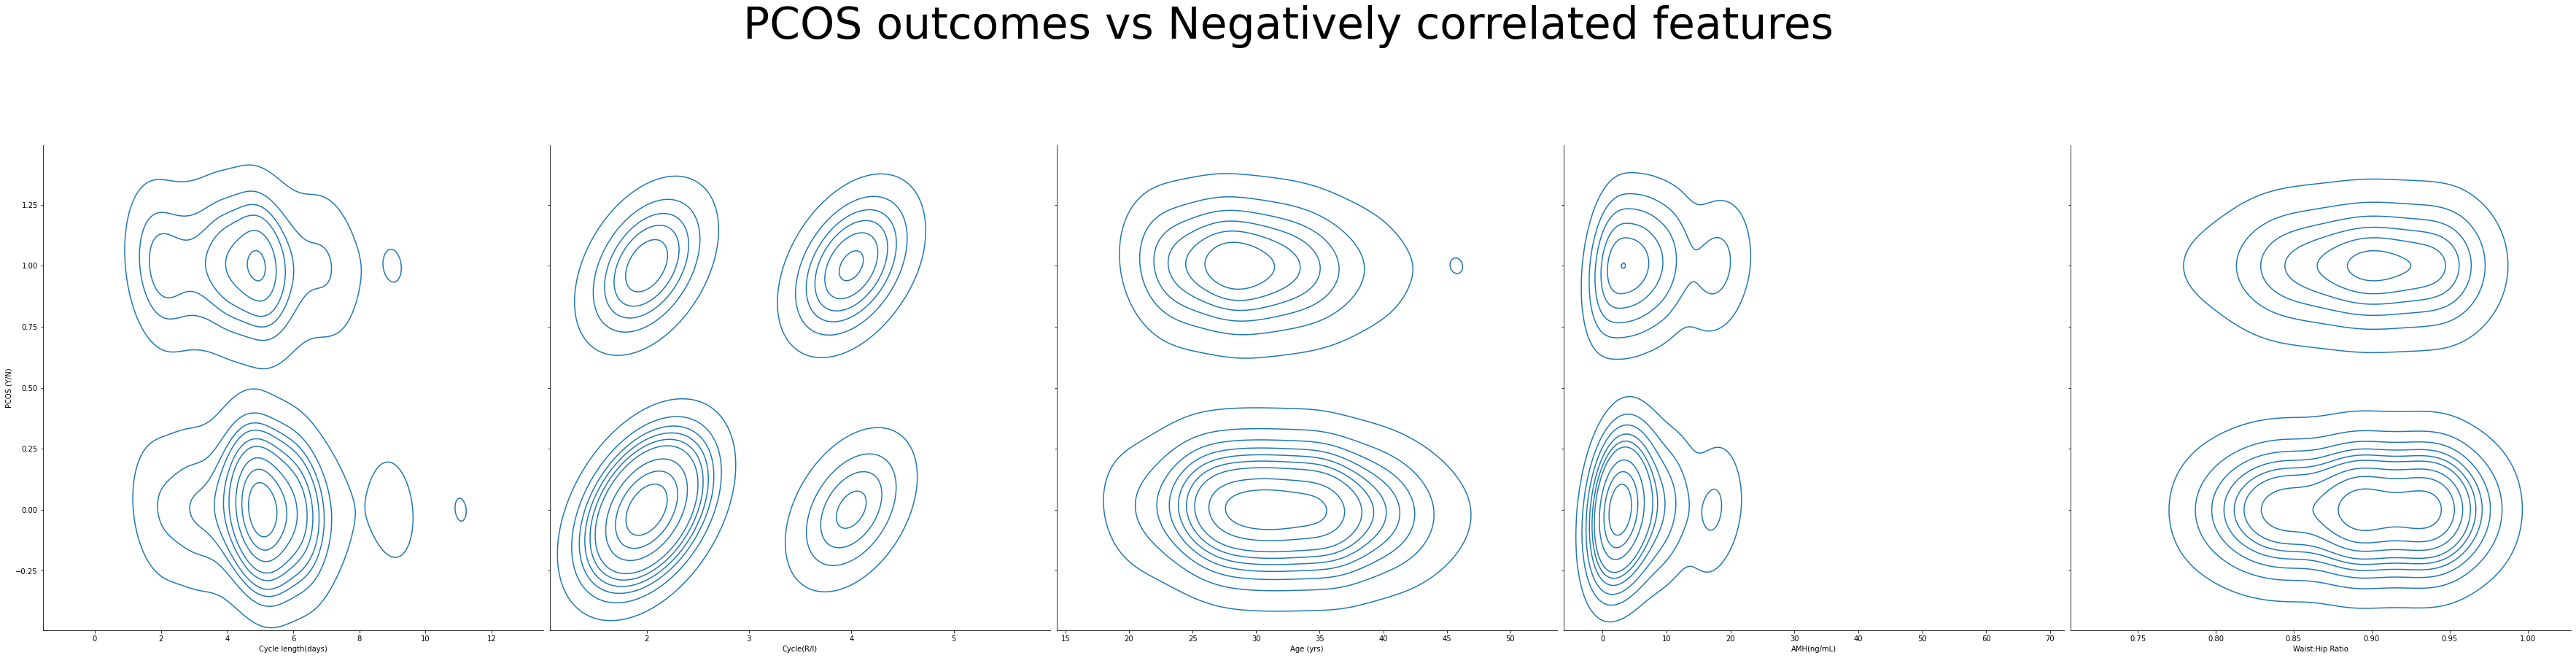

In [7]:
p = sns.pairplot(df, x_vars=["Cycle length(days)", "Cycle(R/I)", "Age (yrs)", "AMH(ng/mL)", "Waist:Hip Ratio"],
             y_vars=["PCOS (Y/N)"],
             kind='kde', height=10)
p.fig.suptitle("PCOS outcomes vs Negatively correlated features", y="1.25", fontsize="60")
plt.plot()

[]

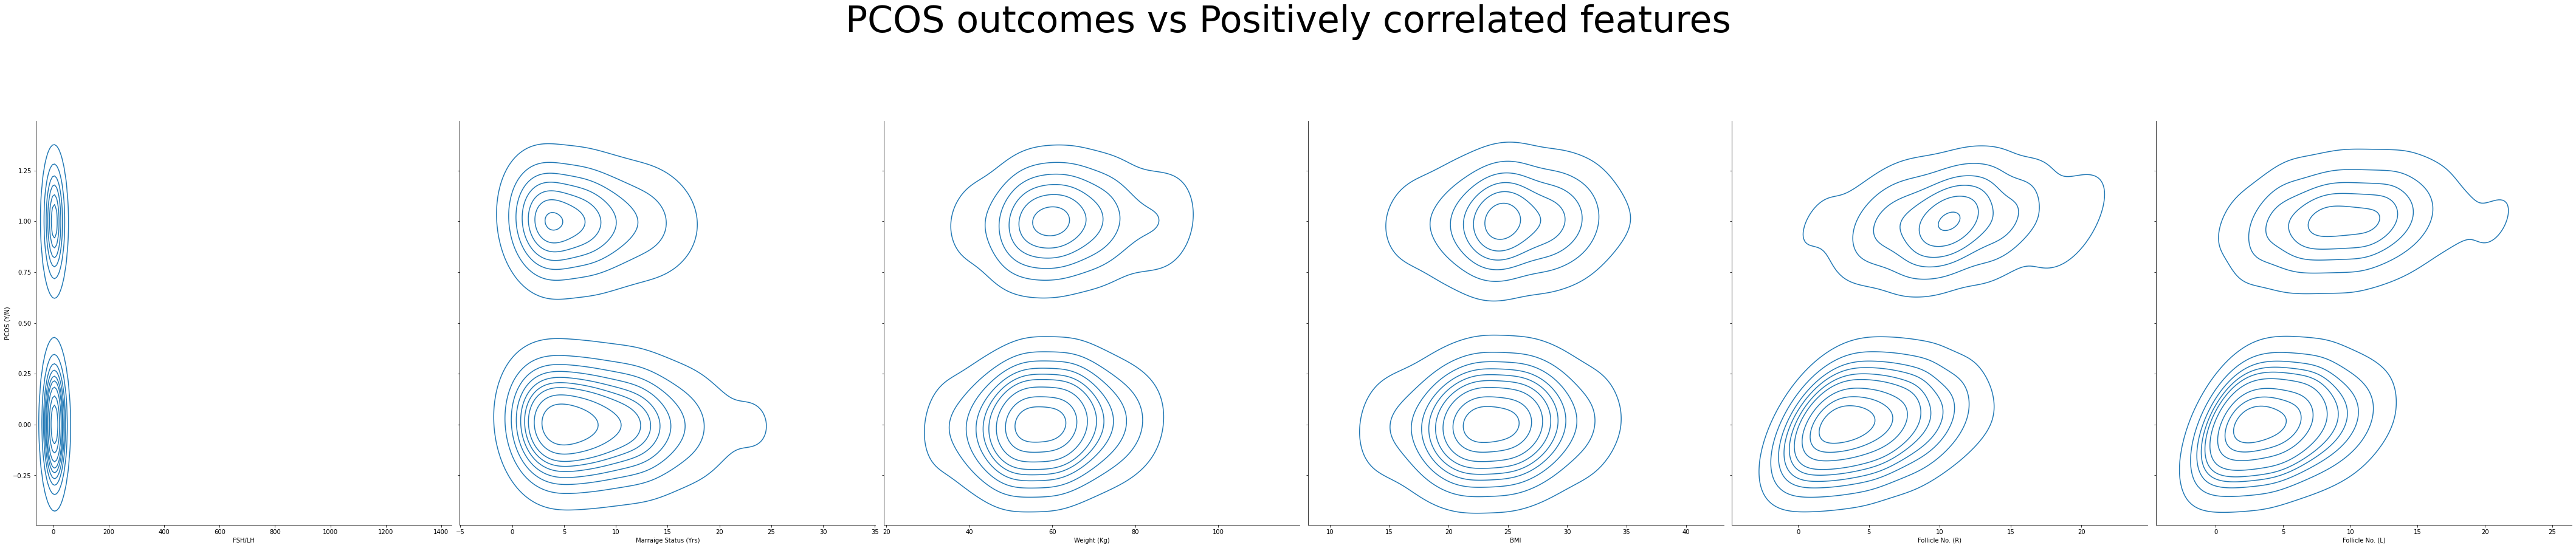

In [8]:
p = sns.pairplot(df, x_vars=["FSH/LH", "Marraige Status (Yrs)", "Weight (Kg)", "BMI", "Follicle No. (R)", "Follicle No. (L)"],
             y_vars=["PCOS (Y/N)"],
             kind='kde', height=10)
p.fig.suptitle("PCOS outcomes vs Positively correlated features", y="1.25", fontsize="60")
plt.plot()

<br><br>
## **Visualizing Dataset**

[]

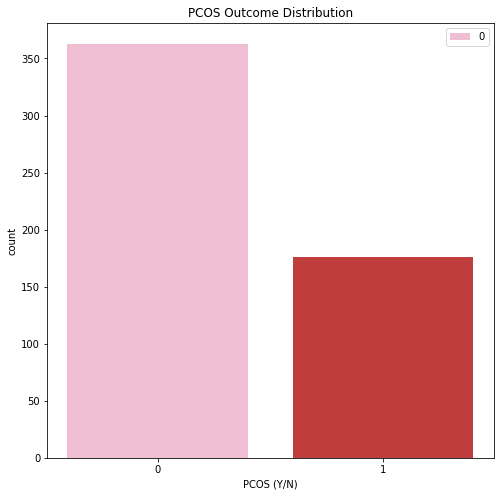

In [22]:
plt.figure(figsize=(8,8))
sns.countplot(x=df['PCOS (Y/N)'], palette="tab20_r").set(title='PCOS Outcome Distribution')
# p.title("PCOS Outcome Distribution", y="1.05", fontsize="20")
plt.plot()

[]

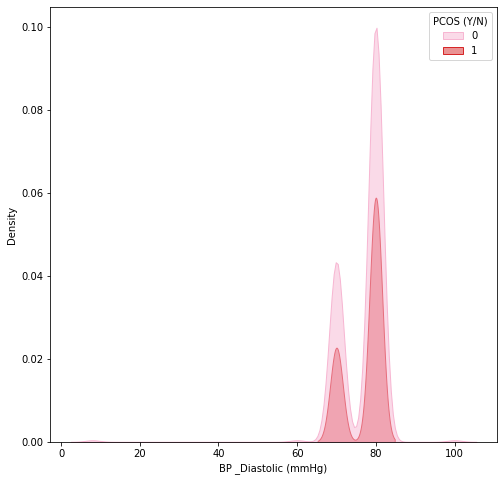

In [10]:
plt.figure(figsize=(8,8))
sns.kdeplot(data=df, x="BP _Diastolic (mmHg)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
plt.plot()

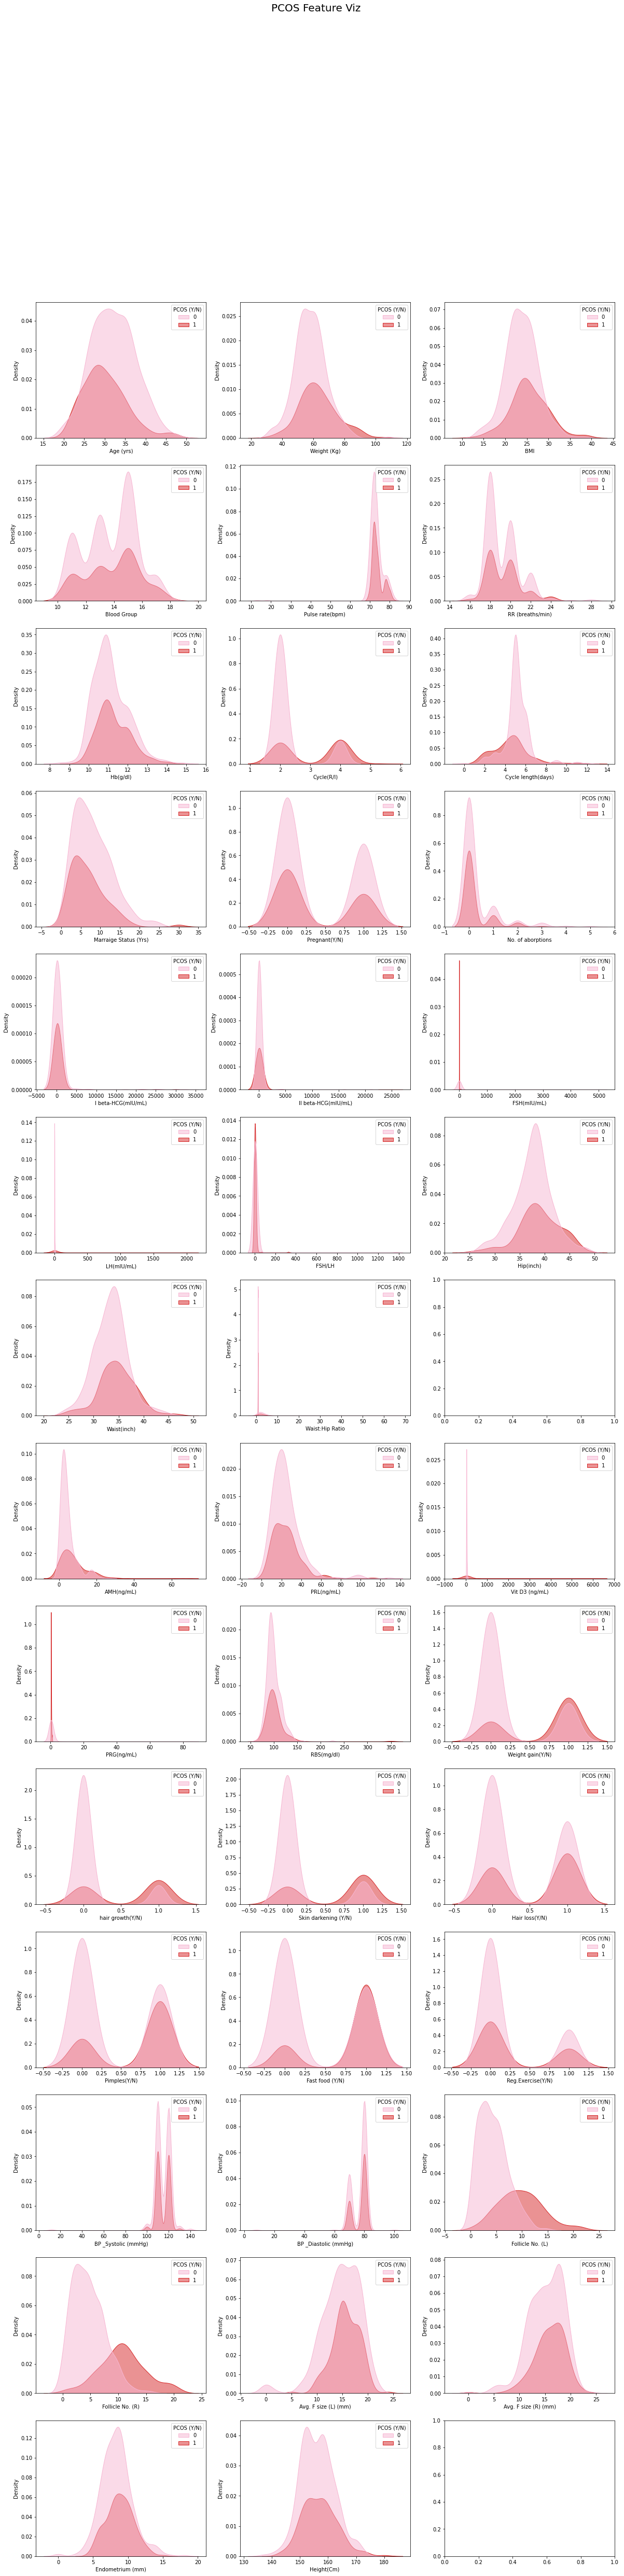

In [20]:
fig, axes = plt.subplots(14, 3, figsize=(20, 80))
 
fig.suptitle('PCOS Feature Viz', fontsize="20")
 
sns.kdeplot(ax=axes[0, 0], data=df, x="Age (yrs)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[0, 1], data=df, x="Weight (Kg)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[0, 2], data=df, x="BMI", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[1, 0], data=df, x="Blood Group", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[1, 1], data=df, x="Pulse rate(bpm) ", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[1, 2], data=df, x="RR (breaths/min)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[2, 0], data=df, x="Hb(g/dl)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[2, 1], data=df, x="Cycle(R/I)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[2, 2], data=df, x="Cycle length(days)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[3, 0], data=df, x="Marraige Status (Yrs)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[3, 1], data=df, x="Pregnant(Y/N)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[3, 2], data=df, x="No. of aborptions", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[4, 0], data=df, x="I beta-HCG(mIU/mL)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[4, 1], data=df, x="II beta-HCG(mIU/mL)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[4, 2], data=df, x="FSH(mIU/mL)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[5, 0], data=df, x="LH(mIU/mL)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[5, 1], data=df, x="FSH/LH", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[5, 2], data=df, x="Hip(inch)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[6, 0], data=df, x="Waist(inch)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[6, 1], data=df, x="Waist:Hip Ratio", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[6, 1], data=df, x="TSH (mIU/L)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[7, 0], data=df, x="AMH(ng/mL)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[7, 1], data=df, x="PRL(ng/mL)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[7, 2], data=df, x="Vit D3 (ng/mL)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[8, 0], data=df, x="PRG(ng/mL)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[8, 1], data=df, x="RBS(mg/dl)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[8, 2], data=df, x="Weight gain(Y/N)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[9, 0], data=df, x="hair growth(Y/N)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[9, 1], data=df, x="Skin darkening (Y/N)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[9, 2], data=df, x="Hair loss(Y/N)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[10, 0], data=df, x="Pimples(Y/N)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[10, 1], data=df, x="Fast food (Y/N)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[10, 2], data=df, x="Reg.Exercise(Y/N)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[11, 0], data=df, x="BP _Systolic (mmHg)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[11, 1], data=df, x="BP _Diastolic (mmHg)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[11, 2], data=df, x="Follicle No. (L)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[12, 0], data=df, x="Follicle No. (R)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[12, 1], data=df, x="Avg. F size (L) (mm)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[12, 2], data=df, x="Avg. F size (R) (mm)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[13, 0], data=df, x="Endometrium (mm)", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")
sns.kdeplot(ax=axes[13, 1], data=df, x="Height(Cm) ", hue="PCOS (Y/N)", fill=True, alpha=0.5, palette="tab20_r")

<br><br>
## **Inferences**

From the Visualizations made above, it is observed that the dataset contains an unbalanced amount of PCOS and non-PCOS responses.

The important points obtained from visualization of features are below:

1.   **PCOS Women have a majority of Cycle (R/I) based around 4 days**, while non-PCOS Women have a majority of Cycle (R/I) based around 2 days
2.   Cycle Lengths among PCOS women have been recorded to be around **2-8 days**.
3.   The age of PCOS Women range from 20-45 yrs, with majority cases between 25-30 yrs.
4.   **Non-PCOS Women have follicle lengths centered around 5 units**, while **PCOS Women have their follicle lengths centered around 10 units** of measurement.

5.   PCOS Women have a **FSH/LH ratio between -5 to 35**, while non-PCOS women have between 0-59.
6.   PCOS Women have **Vit D3 (ng/mL) levels between -100 to 90** as compared to non-PCOS Women whose Vit D3 (ng/mL) levels are centered around 10 to 70.
7.   PCOS Women have a **PRG(ng/mL) level between 0 to 1**, while non-PCOS women have PRG levels between -0.5 to 1.5
8.   PCOS Women also experience **weight gain, hair-growth, skin-darkening, hair-loss, pimples and craving for fast-foods** after developing PCOS.






<br><br>
## **PCOS vs Non-PCOS dataset comparison for Vit D3, FSH/LH and PRG Levels**

In [23]:
df_pcos = df[df['PCOS (Y/N)'] == 1]
df_pcos

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
2,3,1,33,68.8,165.000,25.270891,11,72,18,11.8,...,1,1,0,120,80,13,15,18.0,20.0,10.0
12,13,1,25,74.0,152.000,32.029086,17,72,18,11.7,...,1,1,1,120,80,15,8,20.0,21.0,8.0
19,20,1,30,85.0,165.000,31.221304,16,72,18,12.5,...,1,1,0,120,80,16,8,18.0,17.0,11.0
24,25,1,34,63.0,158.000,25.236340,11,72,20,11.2,...,1,1,0,120,70,4,6,18.0,17.0,7.3
26,27,1,30,76.0,160.000,29.687500,15,75,18,11.2,...,1,1,1,120,80,21,20,11.0,12.0,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,521,1,27,50.0,168.000,17.715420,13,72,18,12.0,...,1,0,0,120,70,18,20,20.0,19.0,7.8
523,524,1,36,60.0,150.000,26.666667,15,72,18,10.2,...,1,0,0,110,80,6,9,17.0,22.0,7.6
524,525,1,27,70.0,170.688,24.026586,13,72,18,11.5,...,0,0,0,120,80,9,10,21.0,23.0,6.5
533,534,1,26,53.5,161.544,20.500862,14,70,18,10.6,...,1,0,0,110,80,8,10,18.0,18.0,10.3


In [24]:
df_non_pcos = df[df['PCOS (Y/N)']==0]
df_non_pcos

,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,0,28,44.6,152.000,19.300000,15,78,22,10.48,...,0,1,0,110,80,3,3,18.0,18.0,8.5
1,2,0,36,65.0,161.500,24.921163,15,74,20,11.70,...,0,0,0,120,70,3,5,15.0,14.0,3.7
3,4,0,37,65.0,148.000,29.674945,13,72,20,12.00,...,0,0,0,120,70,2,2,15.0,14.0,7.5
4,5,0,25,52.0,161.000,20.060954,11,72,18,10.00,...,0,0,0,120,80,3,4,16.0,14.0,7.0
5,6,0,36,74.1,165.000,27.217631,15,78,28,11.20,...,0,0,0,110,70,9,6,16.0,20.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,536,0,26,80.0,161.544,30.655494,18,70,18,10.60,...,0,0,0,110,80,7,9,13.0,17.5,9.6
536,537,0,35,50.0,164.592,18.456637,17,72,16,11.00,...,0,0,0,110,70,1,0,17.5,10.0,6.7
537,538,0,30,63.2,158.000,25.316456,15,72,18,10.80,...,0,0,0,110,70,9,7,19.0,18.0,8.2
538,539,0,36,54.0,152.000,23.372576,13,74,20,10.80,...,0,0,0,110,80,1,0,18.0,9.0,7.3


Text(0.5, 1.0, 'Non-PCOS PRG(ng/mL) Levels')

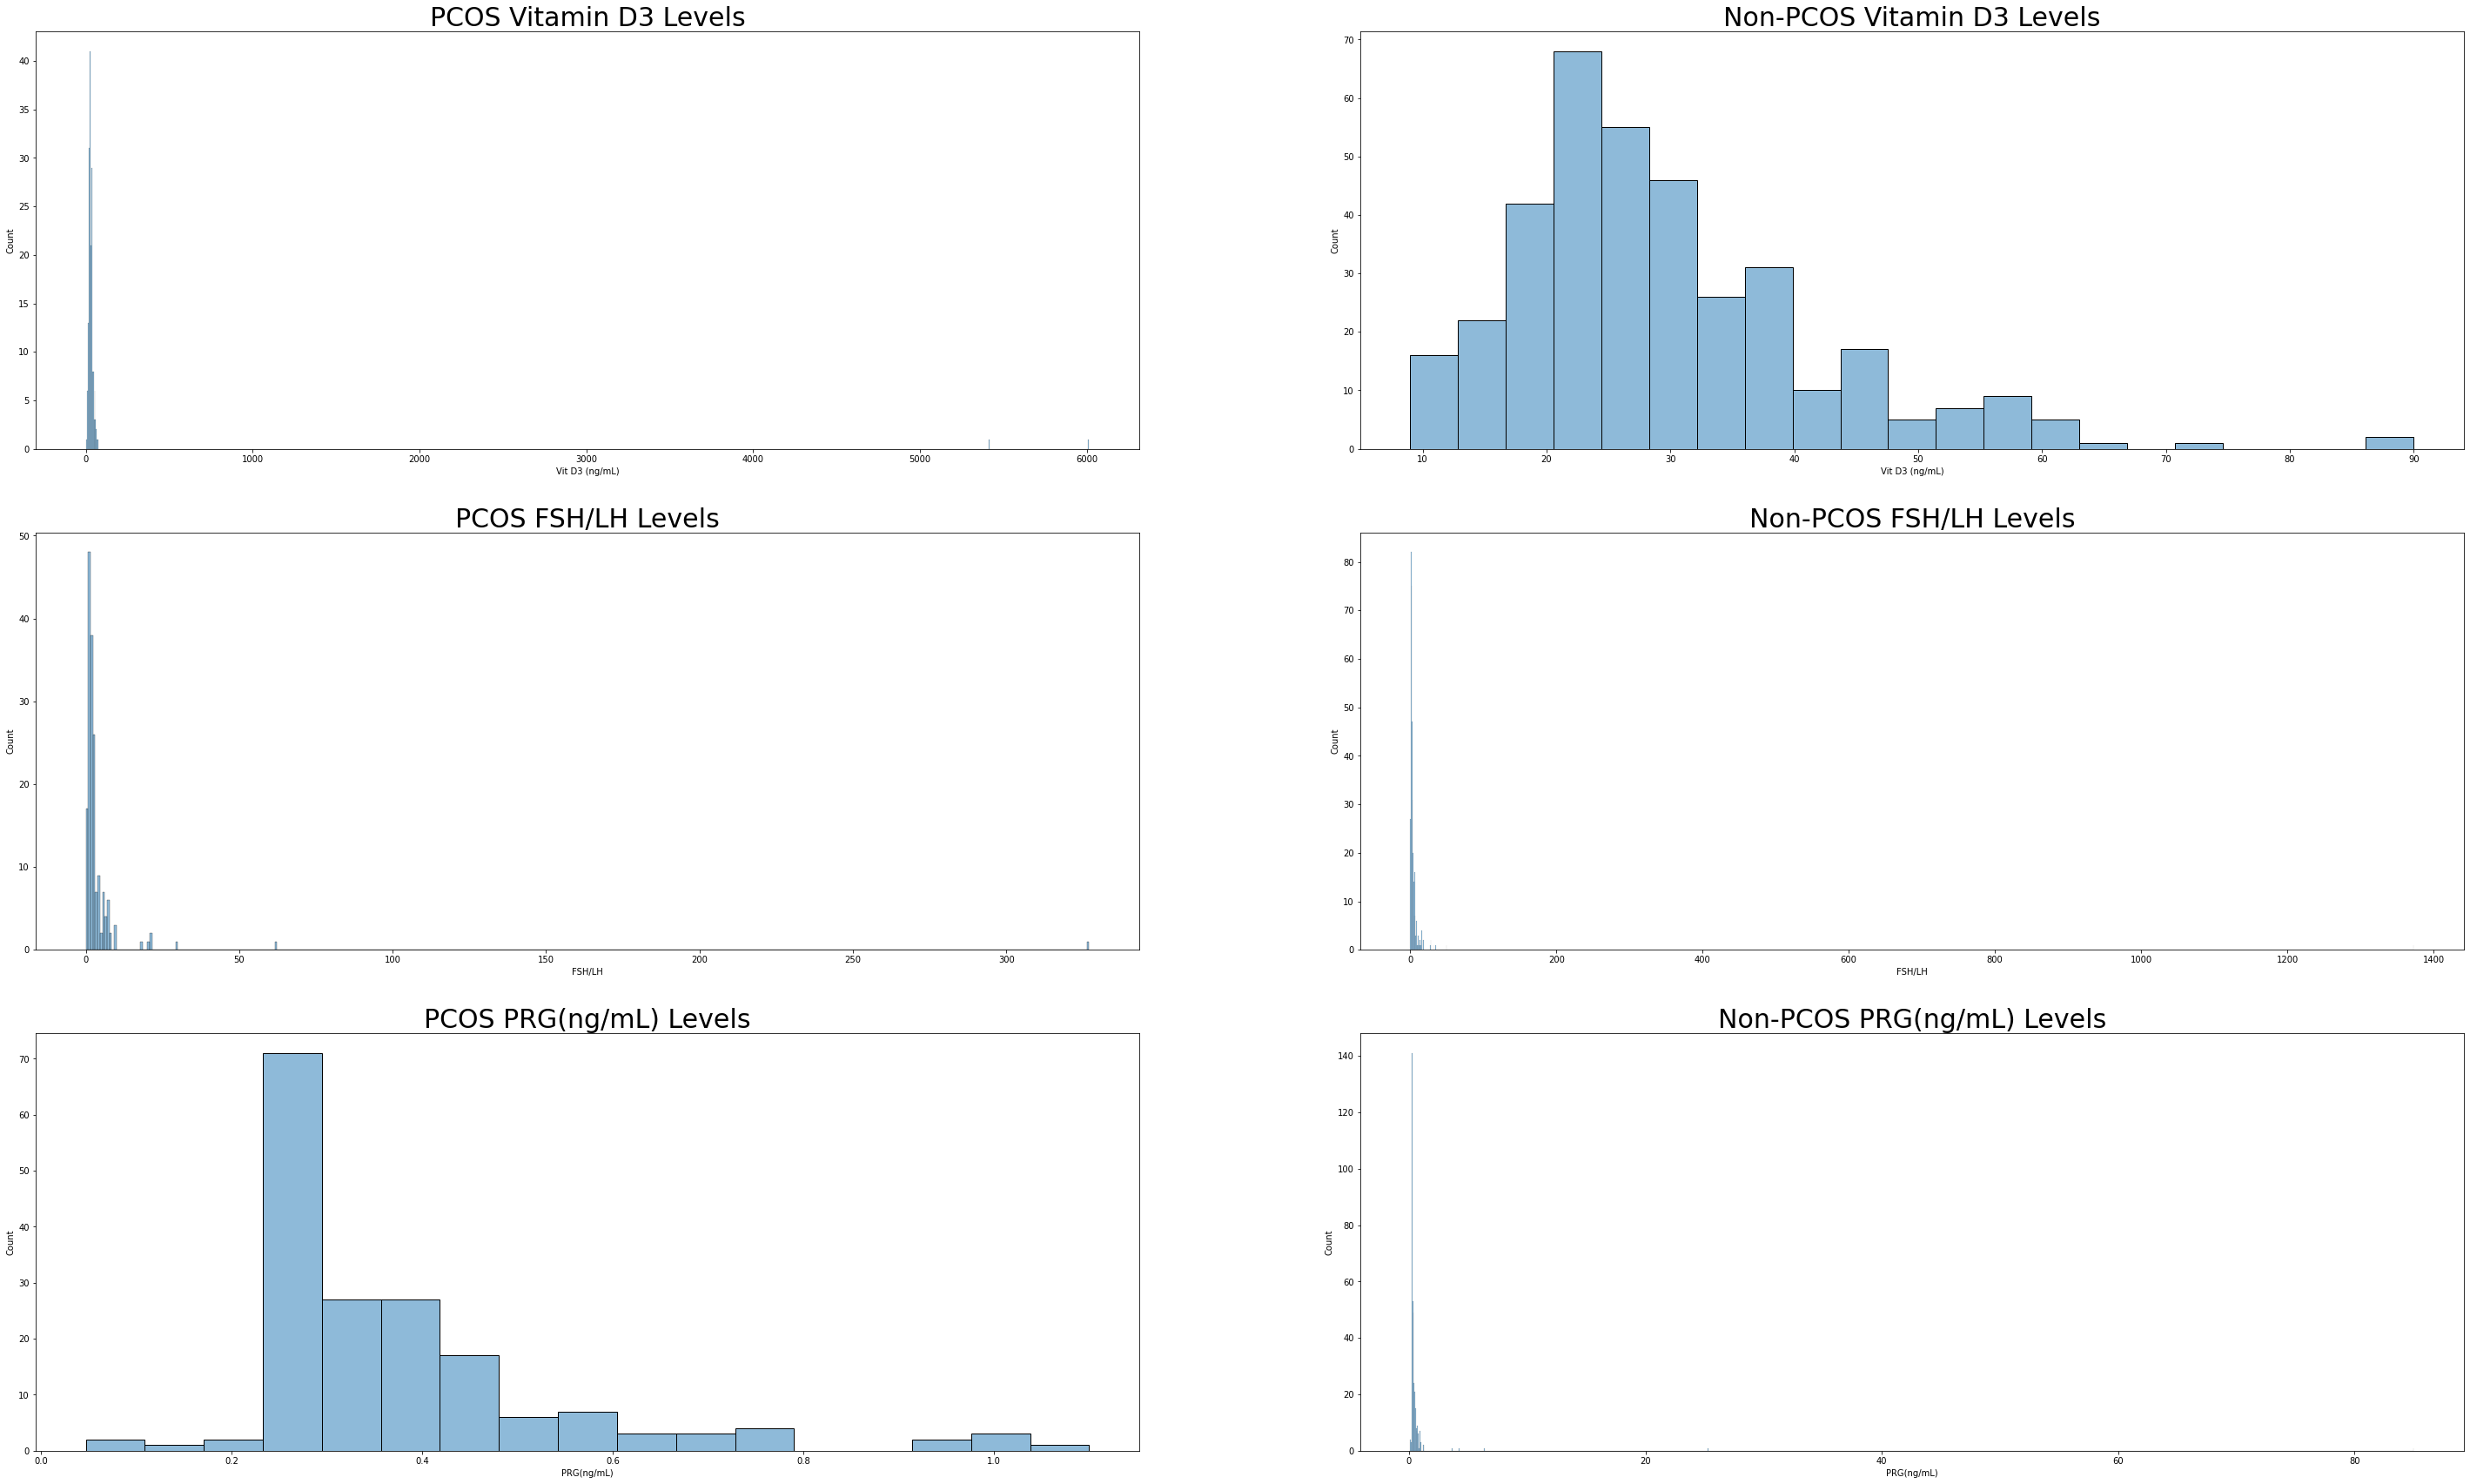

In [34]:
fig, axes = plt.subplots(3, 2, figsize=(50, 30))
 
sns.histplot(ax=axes[0, 0], data=df_pcos, x="Vit D3 (ng/mL)", fill=True, alpha=0.5).set_title("PCOS Vitamin D3 Levels", fontsize="30")
sns.histplot(ax=axes[0, 1], data=df_non_pcos, x="Vit D3 (ng/mL)", fill=True, alpha=0.5).set_title("Non-PCOS Vitamin D3 Levels", fontsize="30")

sns.histplot(ax=axes[1, 0], data=df_pcos, x="FSH/LH", fill=True, alpha=0.5).set_title("PCOS FSH/LH Levels", fontsize="30")
sns.histplot(ax=axes[1, 1], data=df_non_pcos, x="FSH/LH", fill=True, alpha=0.5).set_title("Non-PCOS FSH/LH Levels", fontsize="30")

sns.histplot(ax=axes[2, 0], data=df_pcos, x="PRG(ng/mL)", fill=True, alpha=0.5).set_title("PCOS PRG(ng/mL) Levels", fontsize="30")
sns.histplot(ax=axes[2, 1], data=df_non_pcos, x="PRG(ng/mL)", fill=True, alpha=0.5).set_title("Non-PCOS PRG(ng/mL) Levels", fontsize="30")

In [45]:
# plt.figure(figsize=(100,10))
# sns.histplot(data=df_pcos, x="Vit D3 (ng/mL)", fill=True, alpha=0.5).set_title("PCOS Vitamin D3 Levels", fontsize="30")
# plt.plot()

# Vit D3 Level for PCOS Women
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df_pcos, x="Vit D3 (ng/mL)")
fig.show()

In [46]:
# FSH/LH for PCOS Women
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df_pcos, x="FSH/LH")
fig.show()

In [47]:
# FSH/LH for non-PCOS Women
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df_non_pcos, x="FSH/LH")
fig.show()

In [49]:
# PRG level for non-PCOS Women
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df_non_pcos, x="PRG(ng/mL)")
fig.show()